In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import os

In [4]:
data = {i[:8]:pd.read_csv("clean/" + i, sep="|", skiprows=[0, 1]) 
        for c, i in enumerate(os.listdir("clean"))}

In [5]:
full = []
for i in data:
    df = data[i]
    df.drop(["notes", "sources"], axis=1, inplace=True)
    df.columns = ["place", "confirmed_cases", "deaths"]
    df["date"] = i
    df.loc[df.place == "CHINA TOTAL", "confirmed_cases"] = df.confirmed_cases[:-1].astype(int).sum()
    df.loc[df.place == "CHINA TOTAL", "deaths"] = df.deaths[:-1].astype(int).sum()
    df["confirmed_cases"] = df.confirmed_cases.astype(int)
    df["deaths"] = df.deaths.astype(int)
    full.append(data[i])
full = pd.concat(full)
full.reset_index(drop=True, inplace=True)

In [6]:
t = []
for d in ("20200122", "20200123", "20200124"):
    confirmed_cases = full[full.date == d].confirmed_cases.sum()
    deaths = full[full.date == d].deaths.sum()
    t.append(["CHINA TOTAL", confirmed_cases, deaths, d])
t = pd.DataFrame(t)
t.columns = ["place", "confirmed_cases", "deaths", "date"]
full = pd.concat([full, t])
full.reset_index(drop=True, inplace=True)

In [7]:
china_total = full[full.place == "CHINA TOTAL"]
hubei = full[full.place == "Hubei"]

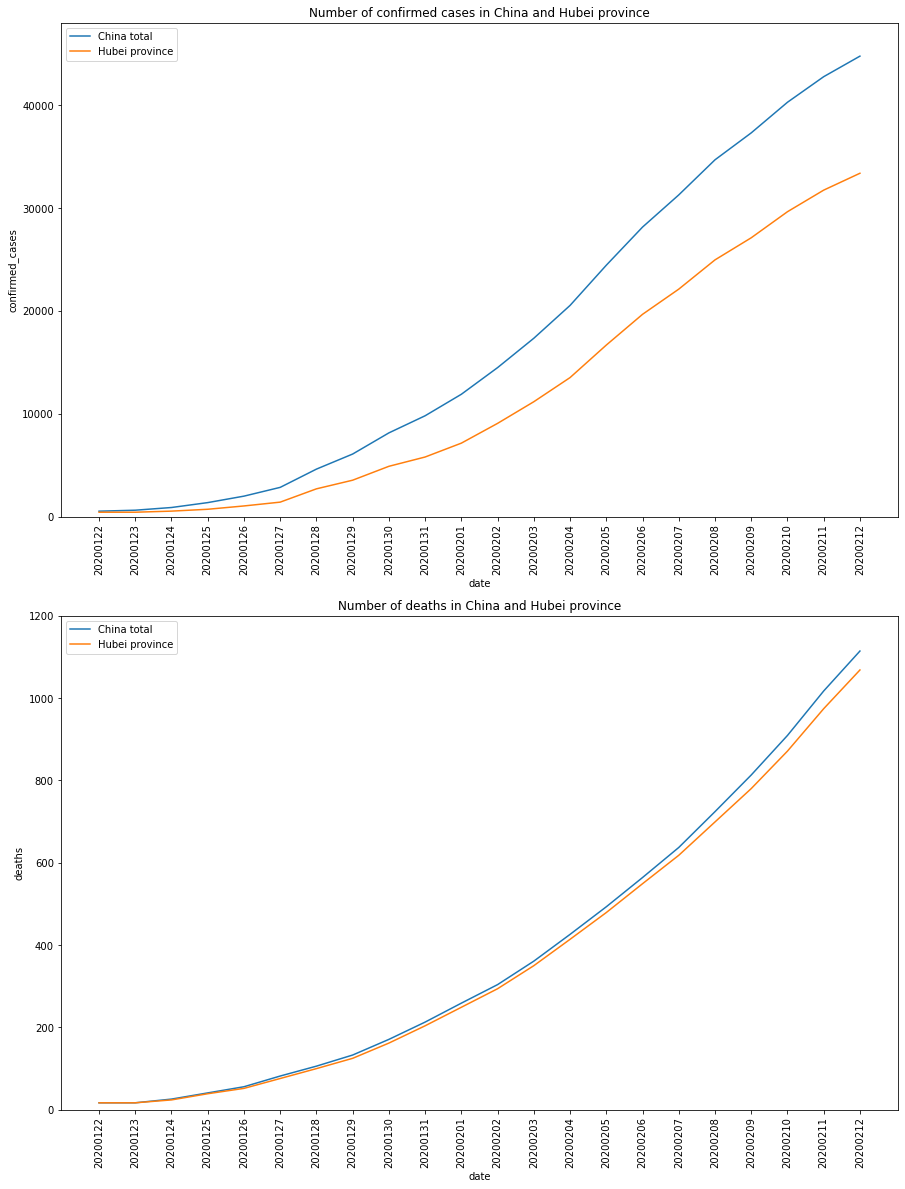

In [8]:
plt.figure(figsize=(15, 20))

plt.subplot(2, 1, 1)
sns.lineplot(x="date", y="confirmed_cases", data=china_total, label="China total")
sns.lineplot(x="date", y="confirmed_cases", data=hubei, label="Hubei province")
plt.ylim(0, 48000)
plt.xticks(rotation=90)
plt.title("Number of confirmed cases in China and Hubei province")

plt.subplot(2, 1, 2)
sns.lineplot(x="date", y="deaths", data=china_total, label="China total")
sns.lineplot(x="date", y="deaths", data=hubei, label="Hubei province")
plt.ylim(0, 1200)
plt.xticks(rotation=90)
plt.title("Number of deaths in China and Hubei province")

plt.legend()
plt.show()

In [118]:
current = full[(full.place != "CHINA TOTAL") & (full.date == "20200212")]
current.columns = ["name", "confirmed_cases", "deaths", "date"]

In [119]:
china = gpd.read_file("china.json")

In [120]:
pinyin = ["Xinjiang", "Xizang", "Inner Mongolia", "Qinghai", "Sichuan", "Heilongjiang", "Gansu", "Yunnan", "Guangxi", 
          "Hunan", "Shaanxi", "Guangdong", "Jilin", "Hebei", "Hubei", "Guizhou", "Shandong", "Jiangxi", "Henan", 
          "Liaoning", "Shanxi", "Anhui", "Fujian", "Zhejiang", "Jiangsu", "Chongqing", "Ningxia", "Hainan", "Taiwan", 
          "Beijing", "Tianjin", "Shanghai", "Hong Kong", "Macau"]
china["name"] = pinyin

In [121]:
current = pd.merge(china, current, how="left")
current.loc[1, "confirmed_cases"] = 0
current.loc[1, "deaths"] = 0
current.loc[1, "date"] = "20200212"

# current.loc[14, "confirmed_cases"] = 0

In [122]:
current

,id,size,name,childNum,geometry,confirmed_cases,deaths,date
0,65,550,Xinjiang,18,"POLYGON ((96.41600 42.75880, 96.41600 42.71480...",59.0,0.0,20200212
1,54,550,Xizang,7,"POLYGON ((79.01370 34.32130, 79.10160 34.45310...",0.0,0.0,20200212
2,15,450,Inner Mongolia,12,"POLYGON ((97.20700 42.80270, 99.49220 42.58300...",60.0,0.0,20200212
3,63,800,Qinghai,8,"POLYGON ((89.73630 36.07910, 89.91210 36.07910...",18.0,0.0,20200212
4,51,900,Sichuan,21,"POLYGON ((101.77730 33.53030, 101.86520 33.574...",436.0,1.0,20200212
5,23,700,Heilongjiang,13,"POLYGON ((121.46480 53.34960, 123.66210 53.569...",378.0,8.0,20200212
6,62,690,Gansu,14,"POLYGON ((96.41600 42.71480, 97.20700 42.80270...",86.0,2.0,20200212
7,53,1200,Yunnan,16,"POLYGON ((98.17380 28.12500, 98.26170 28.38870...",154.0,0.0,20200212
8,45,1450,Guangxi,14,"POLYGON ((104.50200 24.74120, 104.67770 24.609...",222.0,1.0,20200212
9,43,1700,Hunan,14,"POLYGON ((109.24800 28.47660, 109.24800 29.135...",946.0,2.0,20200212


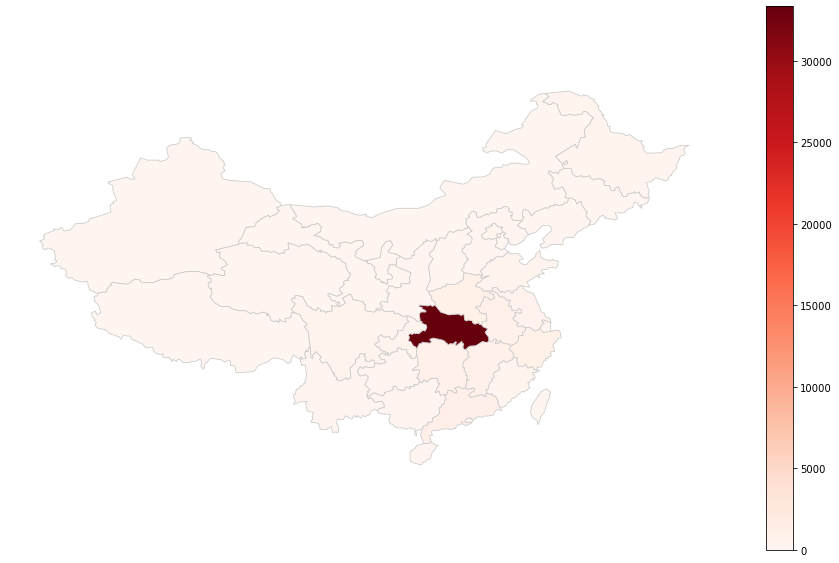

In [124]:
fig, ax = plt.subplots(1, figsize=(16, 10))
current.plot(column="confirmed_cases", cmap="Reds", linewidth=0.8, edgecolor='0.8', ax=ax)
ax.axis("off")

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=33366))
cbar = fig.colorbar(sm)
plt.show()